In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

species = pd.read_csv('species_info.csv')
observations = pd.read_csv('observations.csv')

print(species.head())
print(observations.head())

  category                scientific_name  \
0   Mammal  Clethrionomys gapperi gapperi   
1   Mammal                      Bos bison   
2   Mammal                     Bos taurus   
3   Mammal                     Ovis aries   
4   Mammal                 Cervus elaphus   

                                        common_names conservation_status  
0                           Gapper's Red-Backed Vole                 NaN  
1                              American Bison, Bison                 NaN  
2  Aurochs, Aurochs, Domestic Cattle (Feral), Dom...                 NaN  
3  Domestic Sheep, Mouflon, Red Sheep, Sheep (Feral)                 NaN  
4                                      Wapiti Or Elk                 NaN  
            scientific_name                            park_name  observations
0        Vicia benghalensis  Great Smoky Mountains National Park            68
1            Neovison vison  Great Smoky Mountains National Park            77
2         Prunus subcordata               

In [4]:
print(species.info())
print(species['conservation_status'].value_counts(dropna=False))

#check for missing values
print(species.isnull().sum())

#unique categories
print(species['category'].unique())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5824 entries, 0 to 5823
Data columns (total 4 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   category             5824 non-null   object
 1   scientific_name      5824 non-null   object
 2   common_names         5824 non-null   object
 3   conservation_status  191 non-null    object
dtypes: object(4)
memory usage: 182.1+ KB
None
conservation_status
NaN                   5633
Species of Concern     161
Endangered              16
Threatened              10
In Recovery              4
Name: count, dtype: int64
category                  0
scientific_name           0
common_names              0
conservation_status    5633
dtype: int64
['Mammal' 'Bird' 'Reptile' 'Amphibian' 'Fish' 'Vascular Plant'
 'Nonvascular Plant']


In [ ]:
# we will not do any intervention with the missing value/data
# misssing value = No intervention
species['conservstion_status'].fillna('No intervention', inplace=True)

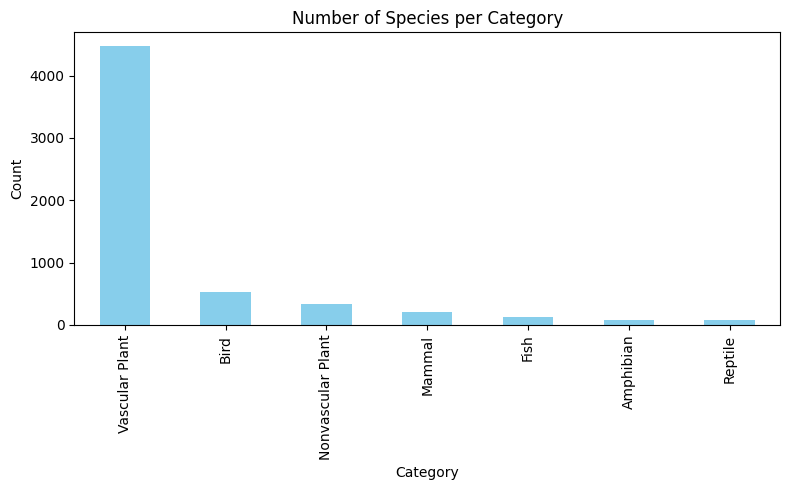

In [ ]:
# species per category
plt.figure(figsize=(8, 5))
species['category'].value_counts().plot(kind='bar', color='skyblue')
plt.title('Number of Species per Category')
plt.ylabel('Count')
plt.xlabel('Category')
plt.tight_layout()
plt.show()


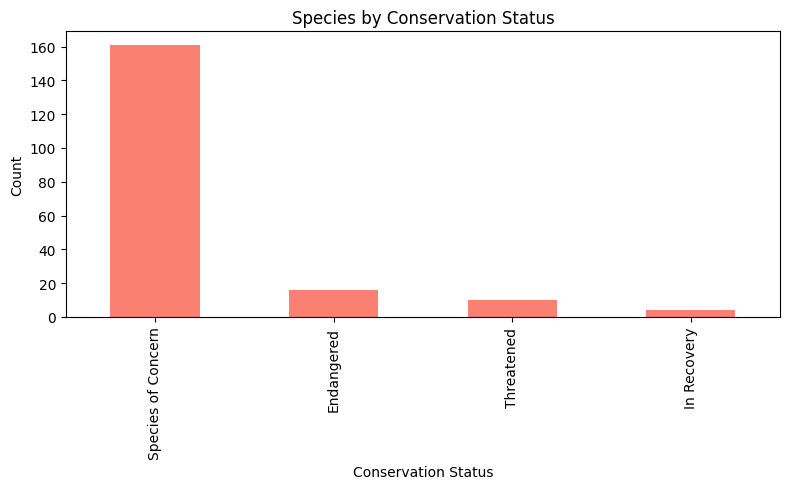

In [11]:
# species by conservation status
plt.figure(figsize=(8, 5))
species['conservation_status'].value_counts().plot(kind='bar', color='salmon')
plt.title('Species by Conservation Status')
plt.ylabel('Count')
plt.xlabel('Conservation Status')
plt.tight_layout()
plt.show()

In [ ]:
# now group and analyze
# 1. number of species by conservation status
status_counts = species.groupby('conservation_status')['scientific_name'].nunique().reset_index()
status_counts.columns = ['conservation_status', 'species_count']
print(status_counts)

  conservation_status  species_count
0          Endangered             15
1         In Recovery              4
2  Species of Concern            151
3          Threatened             10


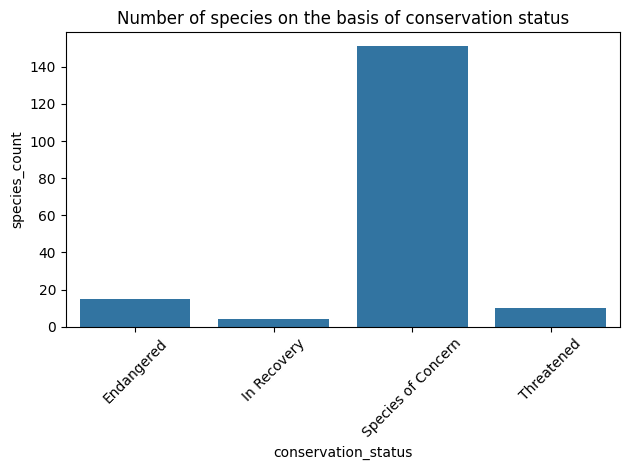

In [6]:
# LET'S VISUALISE THIS USIN SEABORN
sns.barplot(x='conservation_status', y='species_count', data=status_counts)
plt.xticks(rotation = 45)
plt.title("Number of species on the basis of conservation status")
plt.tight_layout()
plt.show()

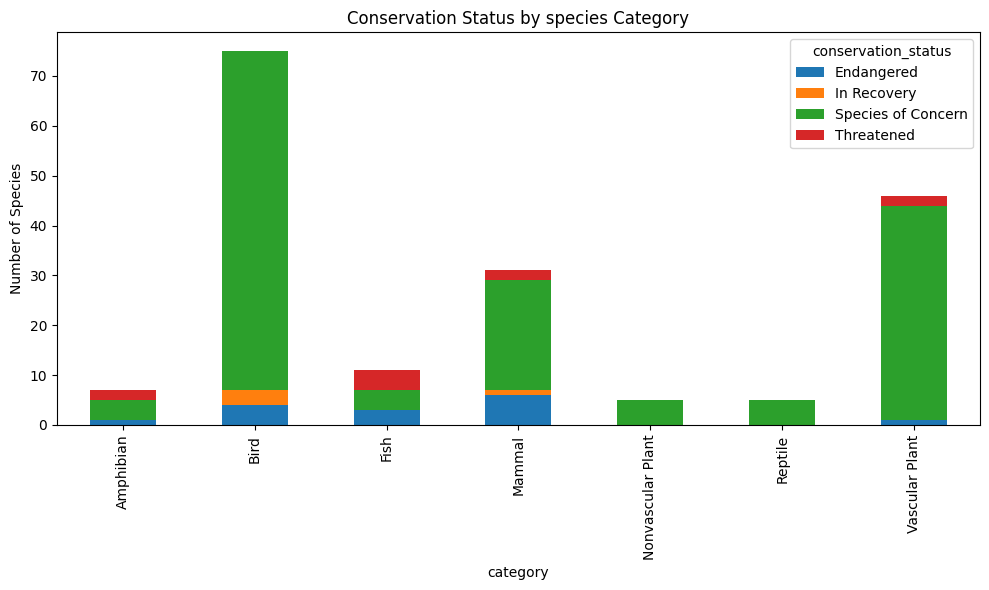

In [7]:
# visualise specie by category and conservation status
category_status = species.groupby(['category','conservation_status'])['scientific_name'].nunique().reset_index()
pivot = category_status.pivot(index='category', columns='conservation_status', values='scientific_name')
pivot.plot(kind='bar', stacked=True, figsize=(10,6))
plt.title('Conservation Status by species Category')
plt.ylabel('Number of Species')
plt.tight_layout()
plt.show()

In [8]:
# merging species info with observations
merged = pd.merge(species,observations,on='scientific_name')
print(merged.head())

  category                scientific_name              common_names  \
0   Mammal  Clethrionomys gapperi gapperi  Gapper's Red-Backed Vole   
1   Mammal  Clethrionomys gapperi gapperi  Gapper's Red-Backed Vole   
2   Mammal  Clethrionomys gapperi gapperi  Gapper's Red-Backed Vole   
3   Mammal  Clethrionomys gapperi gapperi  Gapper's Red-Backed Vole   
4   Mammal                      Bos bison     American Bison, Bison   

  conservation_status                            park_name  observations  
0                 NaN                  Bryce National Park           130  
1                 NaN            Yellowstone National Park           270  
2                 NaN  Great Smoky Mountains National Park            98  
3                 NaN               Yosemite National Park           117  
4                 NaN               Yosemite National Park           128  


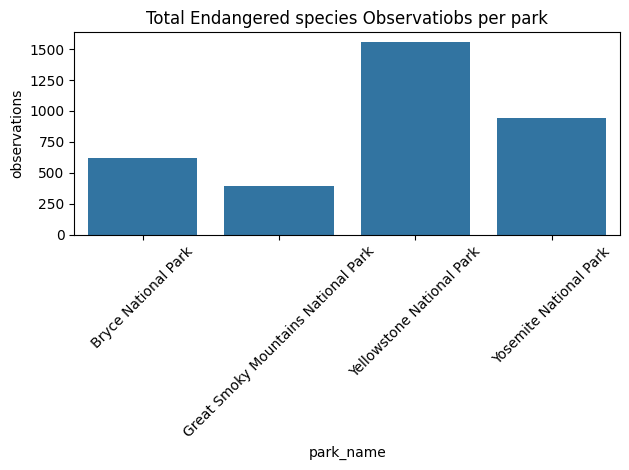

In [9]:
# observations by park for endangered species
endangered_obs = merged[merged['conservation_status'] == 'Endangered']
obs_by_park = endangered_obs.groupby('park_name')['observations'].sum().reset_index()

#now visualisation
sns.barplot(data=obs_by_park, x='park_name', y='observations')
plt.title('Total Endangered species Observatiobs per park')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()